# Data mining vehicle sales data

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Import data
df = pd.read_csv('AS24_Case_Study_Data.csv',delimiter=';')

In [3]:
df.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


Description :

    article_id	             unique article identifier
    product_tier	           premium status of the article
    make_name	              name of the car manufacturer
    price	                  price of the article
    first_zip_digit	        first digit of the zip code of the region the article is offered in
    first_registration_year	year of the first registration of the article
    created_date	           creation date of the listing
    deleted_date	           deletion date of the listing
    search_views	           number of times the article has been shown as a search result
    detail_views	           number of times the article has been clicked on
    stock_days	             Time in days between the creation of the listing and the deletion of the listing
    ctr	                    Click through rate calculated as the quotient of detail_views over search_views


# Data Visualization

In this section we try to understand the data and its relationship to target variables.

In [4]:
df.columns

Index(['article_id', 'product_tier', 'make_name', 'price', 'first_zip_digit',
       'first_registration_year', 'created_date', 'deleted_date',
       'search_views', 'detail_views', 'stock_days', 'ctr'],
      dtype='object')

### 1. Visualize car_make data

In [5]:
#Get the percentage of each car make in each product tier
plus_car = df.make_name.value_counts(normalize=True)
premium_car = df.make_name.value_counts(normalize=True)
basic_car = df.make_name.value_counts(normalize=True)
for car in df.make_name.value_counts().index :
    try: 
        plus_car[car]= df.make_name[df.product_tier =='Plus'].value_counts(normalize=True)[car]
    except:
        plus_car[car] = 0
        
        
    try: 
        premium_car[car]= df.make_name[df.product_tier =='Premium'].value_counts(normalize=True)[car]
    except:
        premium_car[car] = 0
        
                
    try: 
        basic_car[car]= df.make_name[df.product_tier =='Basic'].value_counts(normalize=True)[car]
    except:
        basic_car[car] = 0

In [6]:
#Car make, instances, normalized

print('{:<15s} {:<10s} {:<20s} {:<20s} {:<20s}{:<20s}'.format('Car','Total','Normalized','Basic(Norm)','Plus(Norm)','Premium(Norm)'))
for car in df.make_name.value_counts().index:
    print('{:<15s} {:<10d} {:<20f}  {:<20f}  {:<20f}   {:<20f}'.format(car,
    df.make_name.value_counts()[car],                                      
    df.make_name.value_counts(normalize=True)[car],
    basic_car[car],
    plus_car[car],                                      
    premium_car[car]))



Car             Total      Normalized           Basic(Norm)          Plus(Norm)          Premium(Norm)       
Volkswagen      9430       0.120402              0.120020              0.133681               0.129518            
Renault         6956       0.088814              0.090081              0.086806               0.048193            
Peugeot         5446       0.069534              0.070193              0.050347               0.052926            
Opel            5218       0.066623              0.067143              0.048611               0.054217            
Ford            5199       0.066381              0.066865              0.045139               0.055938            
Mercedes-Benz   4766       0.060852              0.060500              0.053819               0.074010            
BMW             4554       0.058145              0.056947              0.052083               0.098537            
Volvo           3994       0.050995              0.050516              0.055556      

McLaren         2          0.000026              0.000027              0.000000               0.000000            
Morgan          2          0.000026              0.000027              0.000000               0.000000            
Chatenet        2          0.000026              0.000027              0.000000               0.000000            
Donkervoort     1          0.000013              0.000013              0.000000               0.000000            
AC              1          0.000013              0.000013              0.000000               0.000000            
Tata            1          0.000013              0.000000              0.000000               0.000430            
DFSK            1          0.000013              0.000013              0.000000               0.000000            
Grecav          1          0.000013              0.000013              0.000000               0.000000            
Piaggio         1          0.000013              0.000013              0.000000 

From the above data it can be inferred that the normalized car count, Basic tier count, Plus tier count and Premium tier count is almost same. 
There is no evidence of any particular car make being preferred over other for product tier.

### 2. Visualize product tier information

In [7]:
#Encode the product_tier
df['product_tier'] = df.product_tier.astype('category').cat.codes

(array([75421.,     0.,     0.,     0.,     0.,   576.,     0.,     0.,
            0.,  2324.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

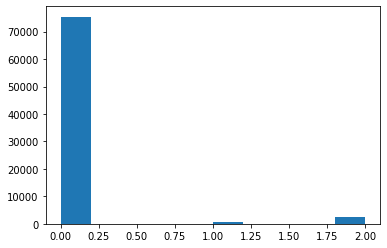

In [8]:
#plot histogram of product tier
plt.hist(df.product_tier)

The classes are imbalanced. A "naive" classifier which predicts every data as product tier "Basic" will have accuracy of 96.32%. Hence the model should improve F1 score from 0.33 and accuracy above 96.32%

### 3. Search and Detail views 

Text(0, 0.5, 'Detail views')

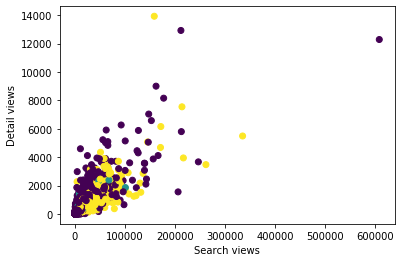

In [9]:
#search view vs detail view
plt.scatter(df.search_views,df.detail_views,c=df.product_tier)
plt.xlabel('Search views')
plt.ylabel('Detail views')

Text(0, 0.5, 'Detail views')

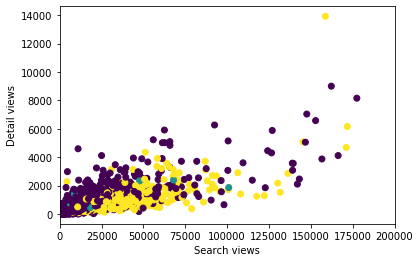

In [10]:
#same plot but with search views limited to a range.
plt.scatter(df.search_views,df.detail_views,c=df.product_tier)
plt.xlim(0,200000)
plt.xlabel('Search views')
plt.ylabel('Detail views')

C:\Users\surao\AppData\Local\Continuum\anaconda3\envs\sudu_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Detail views(log)')

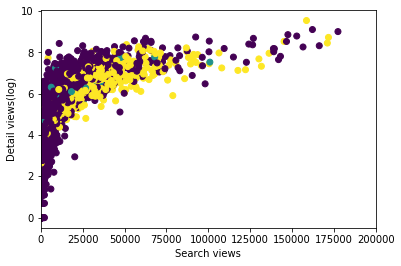

In [11]:
# search view vs logged detail view
plt.scatter(df.search_views,np.log(df.detail_views),c=df.product_tier)
plt.xlim(0,200000)
plt.xlabel('Search views')
plt.ylabel('Detail views(log)')

Text(0, 0.5, 'Detail views')

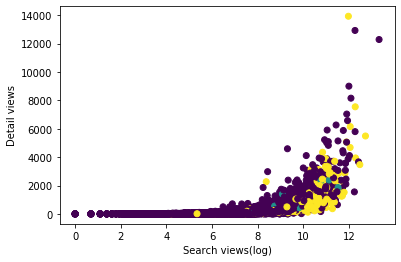

In [12]:
# logged search view vs detail view.
plt.scatter(np.log(df.search_views),df.detail_views,c=df.product_tier)
plt.xlabel('Search views(log)')
plt.ylabel('Detail views')

the 'ctr' is evaluated as ratio of detail views and search views. As the data is not proper, evaluate again.

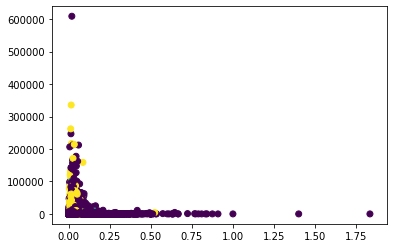

In [13]:
df.ctr = df.detail_views/df.search_views
plt.scatter(df.ctr,df.search_views,c=df.product_tier)

From above plots it can be seen that the Premium product tier froms a cluster at high search views and low detail views. Plus product tier does not form any cluster.

### 4. First registration year and Price

Text(0, 0.5, 'Product tier')

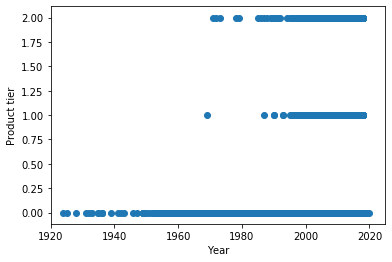

In [14]:
#Visualizing the first registration year
plt.scatter(df.first_registration_year,df.product_tier)
plt.xlim(1920,2025)
plt.xlabel('Year')
plt.ylabel('Product tier')

From above plot we can see that the Premium and Plus product tier is assigned to cars from 1970 onwards and no further information about the distribution is available. 
Additionally, a new attribute age of car can be created which can help in classification.

Text(0, 0.5, 'Price')

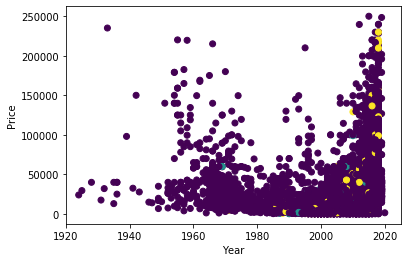

In [15]:
#Visualizing the first registration year and price
plt.scatter(df.first_registration_year,df.price,c=df.product_tier)
plt.xlim(1920,2025)
plt.xlabel('Year')
plt.ylabel('Price')

Some New cars, 20 year old cars and around 50 year old cars have high price. However there seems to be  no relation in terms of product tier and price.

Text(0, 0.5, 'Price')

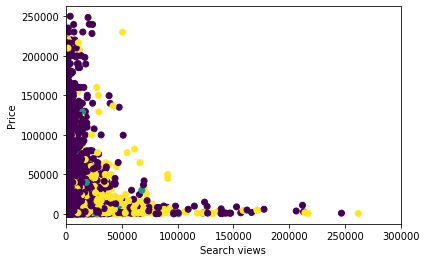

In [16]:
#Visualizing the search views and price
plt.scatter(df.search_views,df.price,c=df.product_tier)
plt.xlim(0,300000)
plt.xlabel('Search views')
plt.ylabel('Price')

Premium product tier cars are majorly within 50000, however most of the cars are in the same price range.

Text(0, 0.5, 'Price(log)')

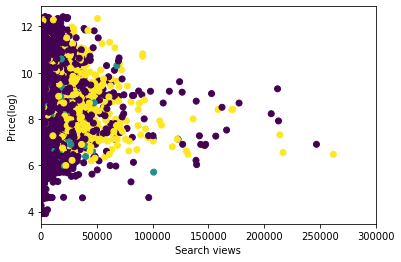

In [17]:
#Visualizing the search views and price(logged)
plt.scatter(df.search_views,np.log(df.price),c=df.product_tier)
plt.xlim(0,300000)
plt.xlabel('Search views')
plt.ylabel('Price(log)')

From above plot we do not see any evidence of relation between price and product tier.

### 5. Stock days.

Text(0, 0.5, 'Stock days')

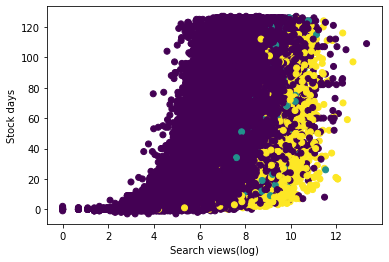

In [18]:
#Visualizing the stock days vs search views logged
plt.scatter(np.log(df.search_views),df.stock_days,c=df.product_tier)
#plt.xlim(0,300000)
plt.xlabel('Search views(log)')
plt.ylabel('Stock days')

There seems to be not much relation between stock days and product tier.

### 6. First zip digit 

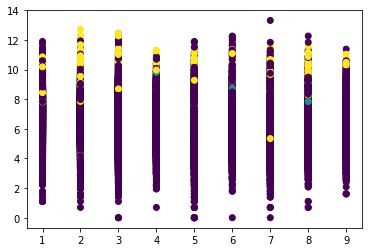

In [19]:
plt.scatter(df.first_zip_digit,np.log(df.search_views),c=df.product_tier)

(array([ 7704.,  9711., 13342.,  6758.,     0., 12166.,  7255., 11006.,
         6205.,  4174.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

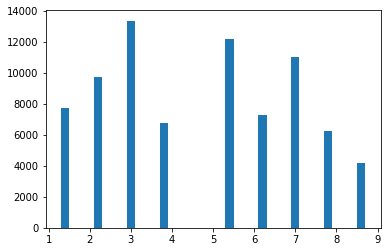

In [20]:
plt.hist(df.first_zip_digit,rwidth=0.25,align='mid')


(array([141., 728., 345., 107.,   0., 281., 107., 306., 259.,  50.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

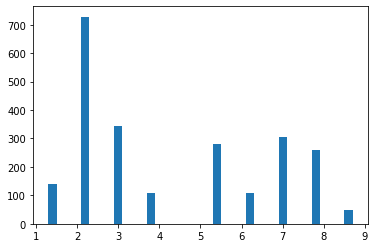

In [21]:
plt.hist(df.first_zip_digit[df.product_tier==2],rwidth=0.25,align='mid')


From above histogram, it can be seen that the ratio of premium car to total car sale is high in city with first digit of zip code 3 and low in city with first digit of zip code as 7

# Data Preprocessing

Create a new dataframe which is preprocessed and in right format for ML models.

article_id does not have any meaningful information and hence can be removed.

In [22]:
df_pp = df.drop(['article_id'],axis=1)

Create new attribute 'car_age' which is age of car when record is created.

In [23]:
df_pp.created_date = pd.to_datetime(df.created_date)
df_pp.created_date = df_pp['created_date'].dt.year
df_pp.loc[:,'car_age'] = df_pp.created_date -df_pp.first_registration_year
df_pp.car_age  = np.where(df_pp.car_age < 1 , 1,df_pp.car_age)

In [24]:
# Remove attributes which does not have correlation with product_tier
df_pp = df_pp.drop(['make_name'],axis=1)
df_pp = df_pp.drop(['first_zip_digit'],axis=1)
#df_pp =pd.get_dummies(df_pp,columns=['first_zip_digit'])
df_pp = df_pp.drop(['first_registration_year'],axis=1)
df_pp = df_pp.drop(['created_date'],axis=1)
df_pp = df_pp.drop(['deleted_date'],axis=1)

In [25]:
df_pp.stock_days  = np.where(df_pp.stock_days < 0 , 0,df_pp.stock_days)

In [26]:
df_pp = df_pp[~np.isnan(df_pp).any(axis=1)]

In [27]:
df_pp.head()

,product_tier,price,search_views,detail_views,stock_days,ctr,car_age
0,0,16750,3091.0,123.0,30,0.039793,5
1,0,35950,3283.0,223.0,52,0.067926,3
2,0,11950,3247.0,265.0,51,0.081614,20
3,0,1750,1856.0,26.0,101,0.014009,15
4,0,26500,490.0,20.0,12,0.040816,4


In [28]:
df_pp.describe()

,product_tier,price,search_views,detail_views,stock_days,ctr,car_age
count,78297.000000,78297.000000,78297.00000,78297.000000,78297.000000,78297.000000,78297.000000
mean,0.066720,15069.670358,2297.91333,93.486583,35.996373,0.046892,7.000485
std,0.348761,16375.598837,6339.52668,228.042547,32.211601,0.038818,6.440443
min,0.000000,50.000000,1.00000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5750.000000,368.00000,13.000000,10.000000,0.024263,3.000000
50%,0.000000,10909.000000,920.00000,36.000000,25.000000,0.038239,5.000000
75%,0.000000,18890.000000,2234.00000,94.000000,55.000000,0.058687,10.000000
max,2.000000,249888.000000,608754.00000,13926.000000,127.000000,1.833333,94.000000


In [29]:
df_pp.corr()

,product_tier,price,search_views,detail_views,stock_days,ctr,car_age
product_tier,1.000000,-0.007658,0.315866,0.244744,-0.011465,-0.051979,0.022855
price,-0.007658,1.000000,0.002961,0.028855,0.085730,0.003768,-0.299590
search_views,0.315866,0.002961,1.000000,0.835632,0.271679,-0.057980,0.110189
detail_views,0.244744,0.028855,0.835632,1.000000,0.281627,0.102228,0.122142
stock_days,-0.011465,0.085730,0.271679,0.281627,1.000000,-0.147767,-0.079362
ctr,-0.051979,0.003768,-0.057980,0.102228,-0.147767,1.000000,0.050117
car_age,0.022855,-0.299590,0.110189,0.122142,-0.079362,0.050117,1.000000


In [30]:
#df_pp = df_pp.drop(['price'],axis=1)
#df_pp = df_pp.drop(['stock_days'],axis=1)
#df_pp = df_pp.drop(['ctr'],axis=1)

# ML models

In this section, we look at various ML classification algorithm and different methodology.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

In [33]:
X,y = df_pp.drop(['product_tier'],axis=1),df_pp.product_tier


In [34]:
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.select_dtypes(np.number)))

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=200920)

In [36]:
def evaluate_classifier(c_name,c,X_train,y_train,X_test,y_test,view_cm = False):
    y_pred = c.fit(X_train,y_train).predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1  = f1_score(y_test,y_pred,average='macro')
    print(f'{c_name}: ACC={acc:.4f}, F1={f1:.4f}')
    
    if(view_cm):
        cm = confusion_matrix(y_test, y_pred) 

        labels = ['Basic', 'Plus','Premium']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for ij,v in np.ndenumerate(cm):
            i,j = ij
            plt.text(j,i,str(v),color="white",ha="center",va="center")
        cax = ax.matshow(cm)
        plt.title('Confusion matrix of the classifier {}'.format(c_name))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
 
  


In [37]:
estimators = {
    'k-NN-1': KNeighborsClassifier(n_neighbors=1),
    'k-NN-3': KNeighborsClassifier(n_neighbors=3),
    'k-NN-5': KNeighborsClassifier(n_neighbors=5),
    'k-NN-9': KNeighborsClassifier(n_neighbors=9),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(),
    'NB': GaussianNB(),
    'NN': MLPClassifier()
}


In [38]:
for c_name,c in estimators.items():
    evaluate_classifier(c_name,c,X_train,y_train,X_test,y_test)

k-NN-1: ACC=0.9551, F1=0.4546
k-NN-3: ACC=0.9662, F1=0.4512
k-NN-5: ACC=0.9669, F1=0.4408
k-NN-9: ACC=0.9666, F1=0.4268
DT: ACC=0.9516, F1=0.4811
SVM: ACC=0.9646, F1=0.3815
NB: ACC=0.9573, F1=0.4389
NN: ACC=0.9708, F1=0.5094


NN: ACC=0.9713, F1=0.5146


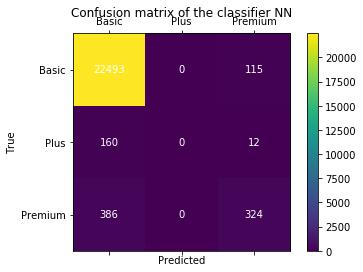

In [39]:
#Confusion matrix of multi layer perceptron classifier.
evaluate_classifier('NN',MLPClassifier(),X_train,y_train,X_test,y_test,view_cm=True)

We see that performance of the model is good for class 'Basic' and average for 'Premium'. As expected, the 'Plus' product tier has the worst performance.

# Oversampling

We saw that the classes are imblalanced. We try oversampling the minority classes to see if it improves the performance. SMOTE and RandomOverSampler are used. As RandomOverSampler provided better performance, the same is shown.

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#smote = SMOTE('not majority')
#X_sm,y_sm = smote.fit_sample(X_train,y_train)

ros = RandomOverSampler('not majority')
X_sm,y_sm = ros.fit_sample(X_train,y_train)

C:\Users\surao\AppData\Local\Continuum\anaconda3\envs\sudu_env\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


(array([52789.,     0.,     0.,     0.,     0.,   404.,     0.,     0.,
            0.,  1614.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

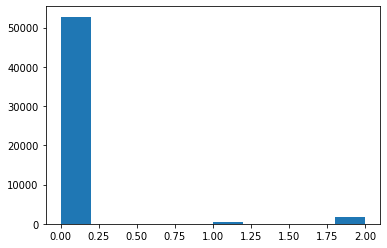

In [41]:
plt.hist(y_train)

(array([52789.,     0.,     0.,     0.,     0., 52789.,     0.,     0.,
            0., 52789.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

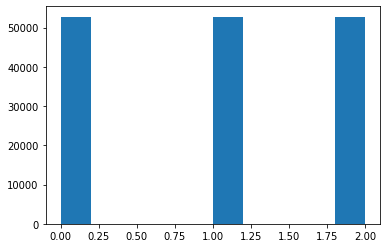

In [42]:
plt.hist(y_sm)

In [43]:
for c_name,c in estimators.items():
    evaluate_classifier(c_name,c,X_sm,y_sm,X_test,y_test)

k-NN-1: ACC=0.9551, F1=0.4546
k-NN-3: ACC=0.9430, F1=0.4599
k-NN-5: ACC=0.9293, F1=0.4549
k-NN-9: ACC=0.9027, F1=0.4351
DT: ACC=0.9544, F1=0.4831
SVM: ACC=0.8715, F1=0.5118
NB: ACC=0.8802, F1=0.4253
NN: ACC=0.8242, F1=0.4678


C:\Users\surao\AppData\Local\Continuum\anaconda3\envs\sudu_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Oversampling does not seem to have improved the performance.

# Bagging

Ensemble techniques are used to check if it improves the model performance.

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

bagging_estimators = {f'{c_name} (B)': BaggingClassifier(c) for c_name, c in estimators.items()}
estimators.update(bagging_estimators)
estimators['RF'] = RandomForestClassifier()

for c_name, c in estimators.items():
    evaluate_classifier(c_name, c, X_train, y_train, X_test, y_test)


k-NN-1: ACC=0.9551, F1=0.4546
k-NN-3: ACC=0.9662, F1=0.4512
k-NN-5: ACC=0.9669, F1=0.4408
k-NN-9: ACC=0.9666, F1=0.4268
DT: ACC=0.9505, F1=0.4766
SVM: ACC=0.9646, F1=0.3815
NB: ACC=0.9573, F1=0.4389
NN: ACC=0.9710, F1=0.5111
k-NN-1 (B): ACC=0.9573, F1=0.4462
k-NN-3 (B): ACC=0.9658, F1=0.4521
k-NN-5 (B): ACC=0.9662, F1=0.4350
k-NN-9 (B): ACC=0.9665, F1=0.4241
DT (B): ACC=0.9691, F1=0.5016
SVM (B): ACC=0.9645, F1=0.3783
NB (B): ACC=0.9567, F1=0.4336


C:\Users\surao\AppData\Local\Continuum\anaconda3\envs\sudu_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN (B): ACC=0.9708, F1=0.5105
RF: ACC=0.9710, F1=0.5123


Random forest perfomance is good, but the F1 score has deteriorated.

# Boosting

Various Boosting methods are evaluated.

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

estimators['AdaBoost'] = AdaBoostClassifier()
estimators['XGBoost'] = XGBClassifier()

for c_name, c in estimators.items():
    evaluate_classifier(c_name, c, X_train, y_train, X_test, y_test)


k-NN-1: ACC=0.9551, F1=0.4546
k-NN-3: ACC=0.9662, F1=0.4512
k-NN-5: ACC=0.9669, F1=0.4408
k-NN-9: ACC=0.9666, F1=0.4268
DT: ACC=0.9512, F1=0.4788
SVM: ACC=0.9646, F1=0.3815
NB: ACC=0.9573, F1=0.4389
NN: ACC=0.9711, F1=0.5126
k-NN-1 (B): ACC=0.9580, F1=0.4524
k-NN-3 (B): ACC=0.9654, F1=0.4440
k-NN-5 (B): ACC=0.9672, F1=0.4452
k-NN-9 (B): ACC=0.9665, F1=0.4246
DT (B): ACC=0.9697, F1=0.5086
SVM (B): ACC=0.9646, F1=0.3800
NB (B): ACC=0.9581, F1=0.4342
NN (B): ACC=0.9709, F1=0.5099
RF: ACC=0.9708, F1=0.5117
AdaBoost: ACC=0.9693, F1=0.4904
XGBoost: ACC=0.9718, F1=0.5220


XGBoost perfomance is good. A closer look at the confusion matrix :

XGBoost: ACC=0.9718, F1=0.5220


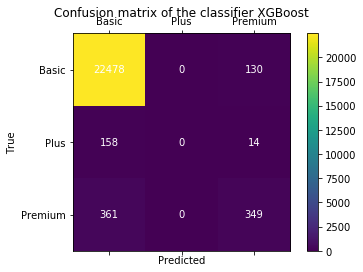

In [46]:
#Confusion matrix of multi layer perceptron classifier.
evaluate_classifier('XGBoost',XGBClassifier(),X_train,y_train,X_test,y_test,view_cm=True)

# Stacking

We try stacking of various algorithm to see if it improves the performance.

In [47]:
from mlens.ensemble import SuperLearner

best_estimators = {
#    'k-NN-1': KNeighborsClassifier(n_neighbors=1),
    'k-NN-3': KNeighborsClassifier(n_neighbors=3),
#    'k-NN-5': KNeighborsClassifier(n_neighbors=5),
    'DT': DecisionTreeClassifier(),
#    'SVM': SVC(),
    'NB': GaussianNB(),
    'NN': MLPClassifier()
}



#encoder = LabelEncoder()
#y_train_encoded = encoder.fit_transform(y_train)
#y_test_encoded = encoder.transform(y_test)

ensemble = SuperLearner()
ensemble.add(list(best_estimators.values()))
ensemble.add_meta(DecisionTreeClassifier())
best_estimators['Stacking'] = ensemble

for c_name, c in best_estimators.items():
    evaluate_classifier(c_name, c, X_train, y_train, X_test, y_test)



[MLENS] backend: threading


k-NN-3: ACC=0.9662, F1=0.4512
DT: ACC=0.9516, F1=0.4798
NB: ACC=0.9573, F1=0.4389
NN: ACC=0.9709, F1=0.5120


C:\Users\surao\AppData\Local\Continuum\anaconda3\envs\sudu_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Stacking: ACC=0.9711, F1=0.5183


Stacking does not seem to have helped improve the performance.

The best performance is from XGBoost!

# Regression for Detail views

Determination of detail views is a regression task. We look at various regression model and its performance.

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
    
def evaluate_regression(X: pd.DataFrame, y: pd.Series, estimators: dict):
    # --- SOLUTION ---
    for e_name, e in estimators.items():
        scores = cross_validate(e, X, y=y, scoring={'MSE': 'neg_mean_squared_error'}, cv=10)
        rmse = np.mean(np.sqrt(np.abs(scores['test_MSE'])))
        print('{}: RMSE={:.2f}'.format(e_name, rmse))


In [49]:
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


def evaluate_multiple(X: pd.DataFrame, y: pd.Series):
    regressors = {
        'Linear Regression': linear_model.LinearRegression(),
        'Ridge': linear_model.Ridge(),
        'Lasso': linear_model.Lasso(max_iter=5000),
        'ElasticNet': linear_model.ElasticNet(),
        #'SVR': SVR(gamma='scale'),
        'k-NN': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(max_depth=20)
    }
    evaluate_regression(X, y, regressors)


Create a new data frame for regression with preprocessing done similar to previous section.

In [50]:
df_reg = df.drop(['article_id'],axis=1)

In [51]:
df_reg.created_date = pd.to_datetime(df_reg.created_date)
df_reg.created_date = df_reg['created_date'].dt.year
df_reg.loc[:,'car_age'] = df_reg.created_date -df_reg.first_registration_year
df_reg.car_age  = np.where(df_reg.car_age < 1 , 1,df_reg.car_age)

In [52]:
# Remove attributes which does not have correlation with detail views
#Preprocess attributes to categorical values or dummy variables.
#df_reg = df_pp.drop(['make_name'],axis=1)
df_reg['make_name'] = df_reg.make_name.astype('category').cat.codes
#df_reg = df_pp.drop(['first_zip_digit'],axis=1)
df_reg =pd.get_dummies(df_reg,columns=['first_zip_digit'])
df_reg = df_reg.drop(['first_registration_year'],axis=1)
df_reg = df_reg.drop(['created_date'],axis=1)
df_reg = df_reg.drop(['deleted_date'],axis=1)

In [53]:
df_reg.stock_days  = np.where(df_reg.stock_days < 0 , 0,df_reg.stock_days)

In [54]:
df_reg = df_reg[~np.isnan(df_reg).any(axis=1)]

As the field 'ctr' is ratio of detail views to search views, to prevent biasness, 'ctr' field is removed.

In [55]:
df_reg = df_reg.drop(['ctr'],axis=1)

In [56]:
df_reg.head()

,product_tier,make_name,price,search_views,detail_views,stock_days,car_age,first_zip_digit_1,first_zip_digit_2,first_zip_digit_3,first_zip_digit_4,first_zip_digit_5,first_zip_digit_6,first_zip_digit_7,first_zip_digit_8,first_zip_digit_9
0,0,62,16750,3091.0,123.0,30,5,0,0,0,0,1,0,0,0,0
1,0,60,35950,3283.0,223.0,52,3,0,0,0,1,0,0,0,0,0
2,0,60,11950,3247.0,265.0,51,20,0,0,1,0,0,0,0,0,0
3,0,33,1750,1856.0,26.0,101,15,0,0,0,0,0,1,0,0,0
4,0,60,26500,490.0,20.0,12,4,0,0,1,0,0,0,0,0,0


In [57]:
df_reg.describe()

,product_tier,make_name,price,search_views,detail_views,stock_days,car_age,first_zip_digit_1,first_zip_digit_2,first_zip_digit_3,first_zip_digit_4,first_zip_digit_5,first_zip_digit_6,first_zip_digit_7,first_zip_digit_8,first_zip_digit_9
count,78297.000000,78297.000000,78297.000000,78297.00000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000,78297.000000
mean,0.066720,57.725839,15069.670358,2297.91333,93.486583,35.996373,7.000485,0.098395,0.124002,0.170364,0.086300,0.155281,0.092660,0.140465,0.079237,0.053297
std,0.348761,26.387580,16375.598837,6339.52668,228.042547,32.211601,6.440443,0.297849,0.329586,0.375955,0.280808,0.362174,0.289957,0.347471,0.270110,0.224627
min,0.000000,0.000000,50.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,5750.000000,368.00000,13.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,67.000000,10909.000000,920.00000,36.000000,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,78.000000,18890.000000,2234.00000,94.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,90.000000,249888.000000,608754.00000,13926.000000,127.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df_reg.corr()

,product_tier,make_name,price,search_views,detail_views,stock_days,car_age,first_zip_digit_1,first_zip_digit_2,first_zip_digit_3,first_zip_digit_4,first_zip_digit_5,first_zip_digit_6,first_zip_digit_7,first_zip_digit_8,first_zip_digit_9
product_tier,1.000000,-0.023863,-0.007658,0.315866,0.244744,-0.011465,0.022855,-0.021887,0.098136,-0.013148,-0.027234,-0.011647,-0.026530,-0.002086,0.020753,-0.027621
make_name,-0.023863,1.000000,-0.098111,-0.050165,-0.065955,-0.027956,-0.030594,-0.011520,-0.010296,-0.010194,0.011579,-0.008721,-0.005342,0.019169,0.006689,0.016230
price,-0.007658,-0.098111,1.000000,0.002961,0.028855,0.085730,-0.299590,0.044823,-0.007639,-0.011320,0.005118,0.003497,0.026055,-0.022554,-0.007672,-0.030835
search_views,0.315866,-0.050165,0.002961,1.000000,0.835632,0.271679,0.110189,-0.008087,0.023397,0.003286,-0.013502,-0.002629,-0.003536,0.004924,0.004450,-0.016391
detail_views,0.244744,-0.065955,0.028855,0.835632,1.000000,0.281627,0.122142,-0.002902,0.008949,0.002517,-0.009597,0.001914,-0.001494,0.009302,0.001757,-0.019157
stock_days,-0.011465,-0.027956,0.085730,0.271679,0.281627,1.000000,-0.079362,0.022703,0.016927,0.008816,0.006338,-0.007180,0.010001,-0.034188,-0.015661,-0.007235
car_age,0.022855,-0.030594,-0.299590,0.110189,0.122142,-0.079362,1.000000,-0.007968,-0.030041,0.007382,-0.011930,0.037700,-0.002124,-0.002787,-0.004383,0.008740
first_zip_digit_1,-0.021887,-0.011520,0.044823,-0.008087,-0.002902,0.022703,-0.007968,1.000000,-0.124291,-0.149700,-0.101527,-0.141638,-0.105569,-0.133546,-0.096910,-0.078383
first_zip_digit_2,0.098136,-0.010296,-0.007639,0.023397,0.008949,0.016927,-0.030041,-0.124291,1.000000,-0.170494,-0.115629,-0.161312,-0.120233,-0.152095,-0.110370,-0.089270
first_zip_digit_3,-0.013148,-0.010194,-0.011320,0.003286,0.002517,0.008816,0.007382,-0.149700,-0.170494,1.000000,-0.139267,-0.194289,-0.144813,-0.183188,-0.132934,-0.107520


#### Evaluation with the data(baseline) 

In [59]:
X,y = df_reg.drop(['detail_views'],axis=1),df_reg.detail_views


In [60]:
X.head()

,product_tier,make_name,price,search_views,stock_days,car_age,first_zip_digit_1,first_zip_digit_2,first_zip_digit_3,first_zip_digit_4,first_zip_digit_5,first_zip_digit_6,first_zip_digit_7,first_zip_digit_8,first_zip_digit_9
0,0,62,16750,3091.0,30,5,0,0,0,0,1,0,0,0,0
1,0,60,35950,3283.0,52,3,0,0,0,1,0,0,0,0,0
2,0,60,11950,3247.0,51,20,0,0,1,0,0,0,0,0,0
3,0,33,1750,1856.0,101,15,0,0,0,0,0,1,0,0,0
4,0,60,26500,490.0,12,4,0,0,1,0,0,0,0,0,0


In [61]:
evaluate_multiple(X,y)

Linear Regression: RMSE=124.02
Ridge: RMSE=124.02
Lasso: RMSE=124.00
ElasticNet: RMSE=123.93
k-NN: RMSE=128.34
Decision Tree: RMSE=159.39


#### Evaluation with the normalized data

The data is normalized using MinMaxSclaer.

In [62]:
X_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.select_dtypes(np.number)))

In [63]:
evaluate_multiple(X_norm,y)

Linear Regression: RMSE=124.02
Ridge: RMSE=125.08
Lasso: RMSE=159.51
ElasticNet: RMSE=223.14
k-NN: RMSE=180.46
Decision Tree: RMSE=157.85


We see that the normalization did not improve the performance!

#### Evaluation with the SIngle Value Decomposed data

The matrix is decomposed using SVD and first 3 components are selected.

In [64]:
X_svd = pd.DataFrame(PCA(n_components = 3).fit_transform(X.select_dtypes(np.number)))

In [65]:
X_svd.head()

,0,1,2
0,1681.396139,790.809323,7.419941
1,20881.641226,956.942093,-11.077099
2,-3118.386862,953.314445,-13.939227
3,-13320.239800,-423.850957,-68.191884
4,11427.876703,-1823.361304,23.445515


In [66]:
evaluate_multiple(X_svd,y)

Linear Regression: RMSE=124.44
Ridge: RMSE=124.44
Lasso: RMSE=124.44
ElasticNet: RMSE=124.44
k-NN: RMSE=128.36
Decision Tree: RMSE=163.21


The performance of the model is slightly better.

We look into some specific regression model in detail.

##### Linear Regression

In [67]:
reg = linear_model.LinearRegression().fit(X_svd,y)

In [68]:
reg.score(X_svd,y)


0.7019785150667037

The model has R^2 value of 0.7 implying average confidence. However there is lot of variance in the detail view data.

In [69]:
reg.coef_

array([ 0.0004079 ,  0.03005564, -0.40443801])

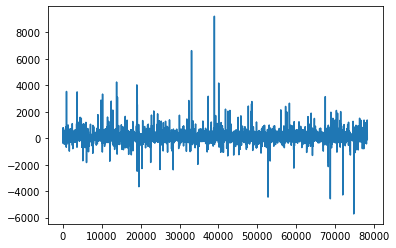

In [70]:
plt.plot(range(len(X_svd)),y-reg.predict(X_svd))

##### Decision Tree Regressor

In [71]:
reg = DecisionTreeRegressor(max_depth=20).fit(X_norm,y)

In [74]:
score = cross_val_score(DecisionTreeRegressor(max_depth=20), X_norm, y, cv=10)
score

array([0.49599039, 0.60576635, 0.63802332, 0.46164601, 0.55927515,
       0.54691698, 0.33904832, 0.61098427, 0.37531058, 0.53619109])

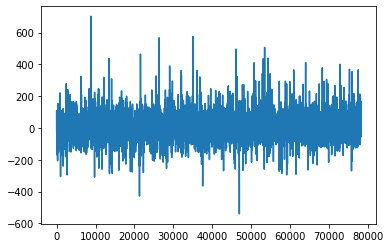

In [73]:
plt.plot(range(len(X_norm)),y-reg.predict(X_norm))